In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('..')

from astroLuSt.database_interface import alerceinterface as aldiai
from astroLuSt.database_interface import eleanorinterface as aldiei
from astroLuSt.database_interface import gaiainterface as aldigi
from astroLuSt.database_interface import lightkurveinterface as aldili
from astroLuSt.database_interface import simbadinterface as aldisi

import importlib
importlib.reload(aldiai)
importlib.reload(aldiei)
importlib.reload(aldigi)
importlib.reload(aldili)
importlib.reload(aldisi)

#style for plotting
plt.style.use('astroLuSt.styles.LuSt_style')

In [3]:
targets = [
    "KIC 5006817", "RR Lyr", "TV Boo"
]

# SimbadDatabaseInterface

In [55]:
SDI = aldisi.SimbadDatabaseInterface()
ids = SDI.get_ids(
    targets
)
tics = SDI.df_ids["TIC"]
print(tics)

INFO: catalog is None. Corresponding id: G 125-7
0    122447138
1    159717514
2    168709463
Name: TIC, dtype: object


# EleanorDatabaseInterface

INFO(EleanorDatabaseInterface.download()): Extracting chunk 1/1 (0/3)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Found star in Sector(s) 14 40 41


No eleanor postcard has been made for your target (yet). Using TessCut instead.
No eleanor postcard has been made for your target (yet). Using TessCut instead.
No eleanor postcard has been made for your target (yet). Using TessCut instead.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.8s remaining:    0.0s


Found star in Sector(s) 14 40 41


No eleanor postcard has been made for your target (yet). Using TessCut instead.
No eleanor postcard has been made for your target (yet). Using TessCut instead.
No eleanor postcard has been made for your target (yet). Using TessCut instead.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   34.7s remaining:    0.0s


Found star in Sector(s) 16 23 49 50


No eleanor postcard has been made for your target (yet). Using TessCut instead.
No eleanor postcard has been made for your target (yet). Using TessCut instead.
No eleanor postcard has been made for your target (yet). Using TessCut instead.
No eleanor postcard has been made for your target (yet). Using TessCut instead.


C:\Users\lukas\AppData\Local\Programs\Python\Python310\lib\site-packages\eleanor\targetdata.py:857: RuntimeWarning: invalid value encountered in divide
  bkgvar = np.nanstd(self.bkg_tpf, axis=(1,2))/(np.nansum(self.bkg_tpf, axis=(1,2)))
C:\Users\lukas\AppData\Local\Programs\Python\Python310\lib\site-packages\eleanor\targetdata.py:1239: RuntimeWarning: invalid value encountered in divide
  tmp_flux[:] /= savgol_filter(tmp_flux, 101, 2)
C:\Users\lukas\AppData\Local\Programs\Python\Python310\lib\site-packages\eleanor\targetdata.py:1239: RuntimeWarning: invalid value encountered in divide
  tmp_flux[:] /= savgol_filter(tmp_flux, 101, 2)
C:\Users\lukas\AppData\Local\Programs\Python\Python310\lib\site-packages\eleanor\targetdata.py:1239: RuntimeWarning: invalid value encountered in divide
  tmp_flux[:] /= savgol_filter(tmp_flux, 101, 2)
C:\Users\lukas\AppData\Local\Programs\Python\Python310\lib\site-packages\eleanor\targetdata.py:1239: RuntimeWarning: invalid value encountered in divide
  tm

UnboundLocalError: local variable 'mesh' referenced before assignment

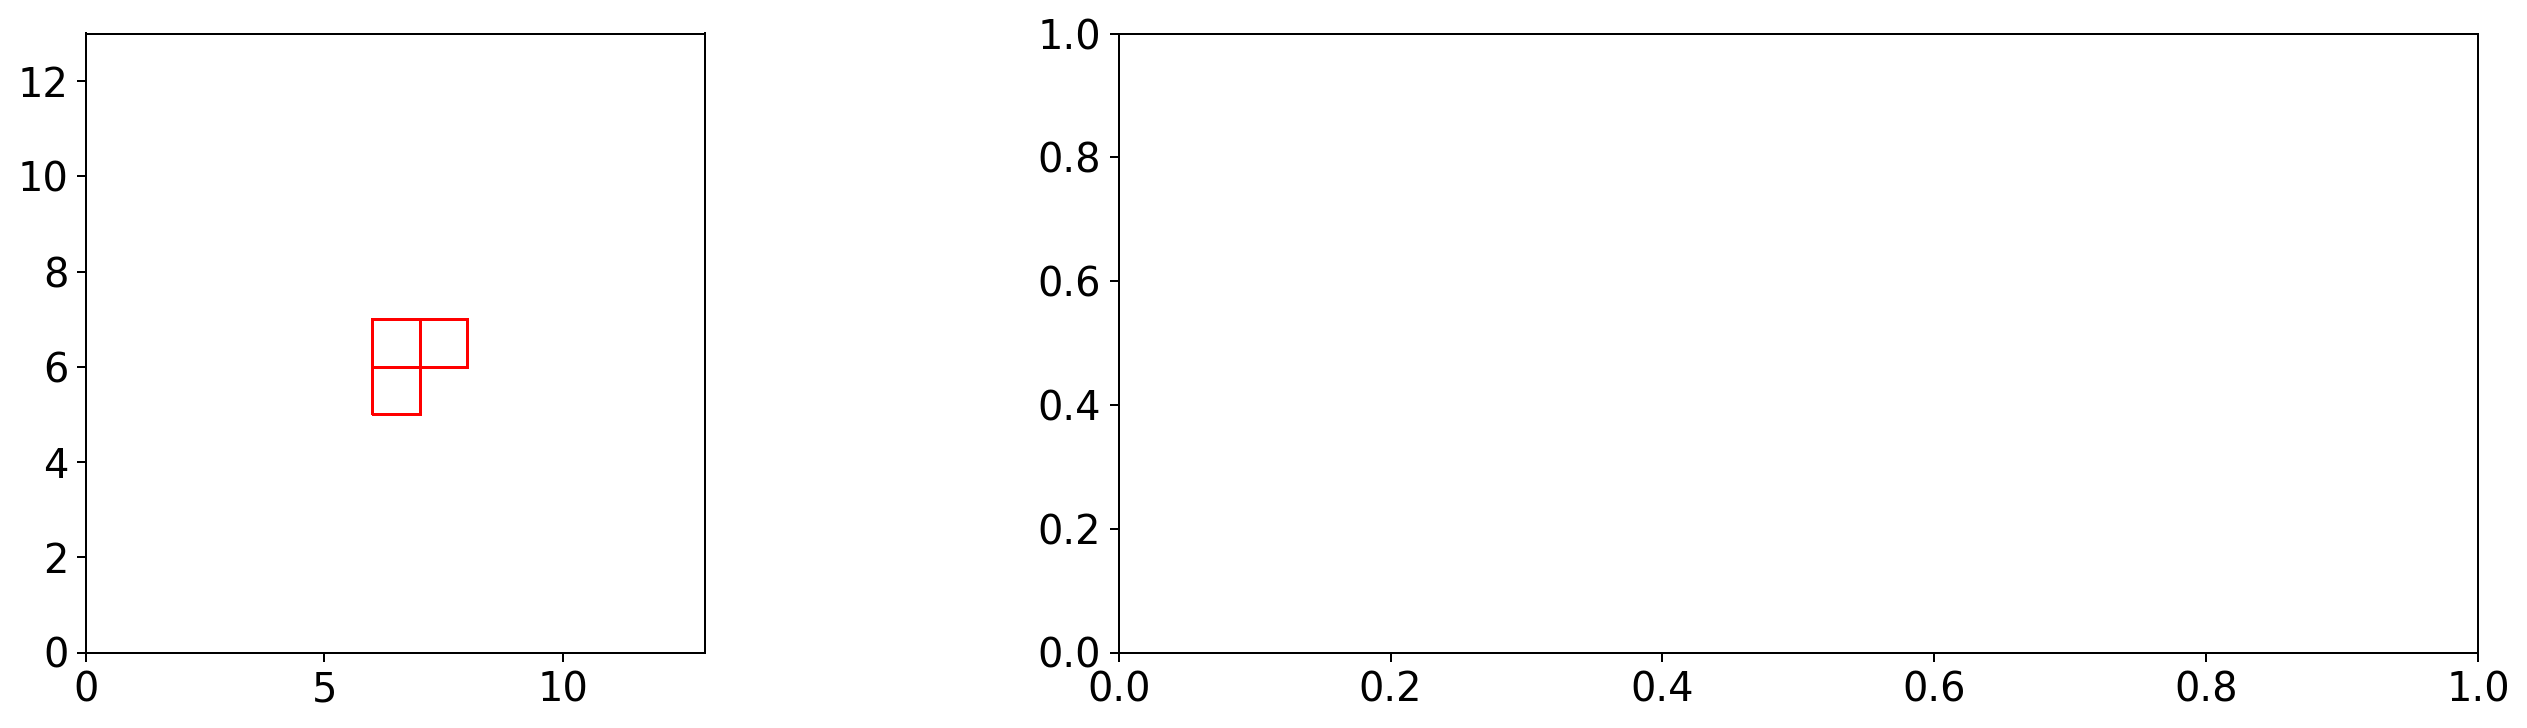

In [62]:
importlib.reload(aldiei)

EDI = aldiei.EleanorDatabaseInterface(
    n_jobs=1,
    redownload=True,
    verbose=3,
    )

lcs, headers, tpfs, aperture_masks = EDI.download(
    sectors=None,
    source_ids=[{'tic':tic} for tic in tics[:]],
    tpfs2store=slice(1), store_aperture_masks=True,
    # tpfs2store=None, store_aperture_masks=True,
    n_chunks=1,
    targetdata_kwargs=dict(do_pca=True, aperture_mode='small'),
    save_kwargs=dict(directory='./data/', pd_savefunc='to_parquet'),
)

fig, axs = EDI.plot_result(
    lcs=lcs[0],
    headers=headers[0],
    # tpfs=tpfs[0],
    aperture_masks=aperture_masks[0],
)

plt.show()

# GaiaDatabaseInterface

In [ ]:
GID = aldigi.GaiaDatabaseInterface()
GID.gaia_crendetials = "../credentials_gaia.txt"

filter = "(jobs['phase'] == 'ERROR')"
GID.remove_all_jobs(pd_filter=filter, login_before=False, logout_after=False)


# AlerceDatabaseInterface

In [25]:
importlib.reload(aldiai)

ADI = aldiai.AlerceDatabaseInterface()

df = pd.DataFrame(
    data=np.array([
        [10054,	12.39495833, 27.02213889,],
        # [10088,	353.7751667, np.inf,],#41.10291667,],
        [10140,	16.294625,	 34.21841667,],
        # [10147,	359.6756667, 41.48880556,],
    ]),
    columns=['id', 'ra', 'dec']
)

df_ztf = ADI.crossmerge_by_coordinates(
    df_left=df,
    ra_colname='ra', dec_colname='dec', radius=1,
    sleep=2E-3,
    n_jobs=1, verbose=2
)

print(ADI.df_error_msgs_crossmerge)

ADI.download_lightcurves(
    df_ztf['oid_ztf'],
    save=False,
    # save='./data/',
    redownload=False,
    plot_result=True, save_plot=False, close_plots=False,
    sleep=2E-3,
    n_jobs=1, verbose=2
)
print(ADI.df_error_msgs_lcdownload)


Extracting #1/2

Extracting #2/2
  idx success original error message
0   0    True                   None
1   1    True                   None

Extracting ZTF22abbjfyk (#1/2)

Extracting ZTF17aabulmo (#2/2)
            ztf success                             original error message
0  ZTF22abbjfyk   False  WARNING: ./data/ZTF22abbjfyk.csv already exist...
1  ZTF17aabulmo   False  WARNING: ./data/ZTF17aabulmo.csv already exist...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished


# LightkurveInterface

In [ ]:

importlib.reload(aldili)
LKI = aldili.LightkurveInterface(
    tics=tics.astype(np.float64)
)

LKI.download_lightcurves_tess(
    #saving data
    save=False,
    sectors='all',
    quality_expression="(datum.quality == 0)",
    include_aperture=False, include_tpf=False,
    #plotting
    plot_result=True,
    aperture_detail=50, ylims=None,
    fontsize=16, figsize=(16,9),
    save_plot=False,
    sleep=0,
    n_jobs=1, n_chunks=1,
    verbose=2
)

print(LKI.df_extraction_summary)